In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with_hqe = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5008_seed_2008_upgrade_interpolaed_20250613_020719_new_loss_NEW_asdat.parquet')

no_hqe = pd.read_parquet('/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5008_seed_2008_spsiceftp_no_hqe_new_muon_20250612_011640_new_loss.parquet')


In [3]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import os

output_folder = "/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output"
parquet_files = [
    "FINAL_out_10000_events_1_to_100gev_simset_5006_seed_2006_spsiceftp_no_hqe_new_muon_20250612_122845_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_5007_seed_2007_spsiceftp_no_hqe_new_muon_20250612_122856_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_5008_seed_2008_spsiceftp_no_hqe_new_muon_20250612_122902_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_5009_seed_2009_spsiceftp_no_hqe_new_muon_20250612_122910_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_5010_seed_2010_spsiceftp_no_hqe_new_muon_20250612_122917_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
]

parquet_files = [os.path.join(output_folder, f) for f in parquet_files]

def load_parquet(file_path):
    print(f"Loading {file_path}...")
    try:
        df = pd.read_parquet(file_path)
        print(f"  Successfully loaded with pandas, shape: {df.shape}")
        return df
    except Exception as e:
        print(f"  Pandas read failed: {e}")
        print(f"  Trying pyarrow...")
        try:
            table = pq.read_table(file_path)
            df = table.to_pandas()
            print(f"  Successfully loaded with pyarrow, shape: {df.shape}")
            return df
        except Exception as e2:
            print(f"  PyArrow read also failed: {e2}")
            parquet_file = pq.ParquetFile(file_path)
            print(f"  File schema: {parquet_file.schema}")
            return None

# Check if files exist
missing_files = [f for f in parquet_files if not os.path.exists(f)]
if missing_files:
    print(f"Warning: The following files are missing: {missing_files}")
    parquet_files = [f for f in parquet_files if os.path.exists(f)]

dfs = []

for file_path in parquet_files:
    df = load_parquet(file_path)
    if df is not None:
        file_id = os.path.basename(file_path).split('_')[3]  # Extract simset ID
        df['source_file'] = file_id
        dfs.append(df)

if not dfs:
    print("No data could be loaded from the provided files.")
else:
    try:
        combined_df = pd.concat(dfs, ignore_index=True)
        print("\nSuccessfully combined all DataFrames!")
        print(f"Combined shape: {combined_df.shape}")
        print("\nFirst few rows of the combined DataFrame:")
        print(combined_df.head())
        print("\nEvents per source file:")
        print(combined_df['source_file'].value_counts())
        print("\nColumn names:", combined_df.columns.tolist())
        
        if 'mc_truth' in combined_df.columns:
            print("\nmc_truth structure (first event):", type(combined_df['mc_truth'].iloc[0]))
            try:
                print("mc_truth keys:", list(combined_df['mc_truth'].iloc[0].keys()))
            except:
                print("Could not extract mc_truth keys")
        
        if 'photons' in combined_df.columns:
            print("\nphotons structure (first event):", type(combined_df['photons'].iloc[0]))
            try:
                print("photons keys:", list(combined_df['photons'].iloc[0].keys()))
            except:
                print("Could not extract photons keys")
    except Exception as e:
        print(f"Error combining DataFrames: {e}")
        
        print("Trying alternative approach for combining data...")
        
        combined_data = {
            'mc_truth': [],
            'photons': []
        }
        
        for file_path in parquet_files:
            try:
                parquet_file = pq.ParquetFile(file_path)
                table = parquet_file.read()
                data_dict = table.to_pydict()
                
                if 'mc_truth' in data_dict:
                    combined_data['mc_truth'].extend(data_dict['mc_truth'])
                if 'photons' in data_dict:
                    combined_data['photons'].extend(data_dict['photons'])
                
                print(f"Added data from {file_path}")
            except Exception as e:
                print(f"Could not process {file_path}: {e}")
        
        combined_df = pd.DataFrame(combined_data)
        print(f"Created combined DataFrame with shape: {combined_df.shape}")

# try:
#     save_path = os.path.join(output_folder, 'combined_60k_events.parquet')
#     print(f"\nSaving combined data to '{save_path}'...")
#     combined_df.to_parquet(save_path)
#     print("Save successful!")
# except Exception as e:
#     print(f"Error saving combined file: {e}")
    
#     # Try alternative save approach
#     print("Trying alternative save approach...")
#     try:
#         # Convert to arrow table and save
#         import pyarrow as pa
#         table = pa.Table.from_pandas(combined_df)
#         pq.write_table(table, save_path)
#         print("Save successful using pyarrow!")
#     except Exception as e2:
#         print(f"Alternative save also failed: {e2}")

no_hqe = combined_df.copy()

Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5006_seed_2006_spsiceftp_no_hqe_new_muon_20250612_122845_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5007_seed_2007_spsiceftp_no_hqe_new_muon_20250612_122856_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_5008_seed_2008_spsiceftp_no_hqe_new_muon_20250612_122902_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simse

In [51]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import os

output_folder = "/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output"
parquet_files = [
    "FINAL_out_10000_events_1_to_100gev_simset_8006_seed_2006_spsiceftp_with_hqe_new_muon_20250612_122516_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_8007_seed_2007_spsiceftp_with_hqe_new_muon_20250612_122506_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_8008_seed_2008_spsiceftp_with_hqe_new_muon_20250612_122455_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_8009_seed_2009_spsiceftp_with_hqe_new_muon_20250612_122527_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
    "FINAL_out_10000_events_1_to_100gev_simset_8010_seed_2010_spsiceftp_with_hqe_new_muon_20250612_122532_new_loss_NEW_ASDAT_FROMOMSIM.parquet",
]

parquet_files = [os.path.join(output_folder, f) for f in parquet_files]

def load_parquet(file_path):
    print(f"Loading {file_path}...")
    try:
        df = pd.read_parquet(file_path)
        print(f"  Successfully loaded with pandas, shape: {df.shape}")
        return df
    except Exception as e:
        print(f"  Pandas read failed: {e}")
        print(f"  Trying pyarrow...")
        try:
            table = pq.read_table(file_path)
            df = table.to_pandas()
            print(f"  Successfully loaded with pyarrow, shape: {df.shape}")
            return df
        except Exception as e2:
            print(f"  PyArrow read also failed: {e2}")
            parquet_file = pq.ParquetFile(file_path)
            print(f"  File schema: {parquet_file.schema}")
            return None

# Check if files exist
missing_files = [f for f in parquet_files if not os.path.exists(f)]
if missing_files:
    print(f"Warning: The following files are missing: {missing_files}")
    parquet_files = [f for f in parquet_files if os.path.exists(f)]

dfs = []

for file_path in parquet_files:
    df = load_parquet(file_path)
    if df is not None:
        file_id = os.path.basename(file_path).split('_')[3]  # Extract simset ID
        df['source_file'] = file_id
        dfs.append(df)

if not dfs:
    print("No data could be loaded from the provided files.")
else:
    try:
        combined_df = pd.concat(dfs, ignore_index=True)
        print("\nSuccessfully combined all DataFrames!")
        print(f"Combined shape: {combined_df.shape}")
        print("\nFirst few rows of the combined DataFrame:")
        print(combined_df.head())
        print("\nEvents per source file:")
        print(combined_df['source_file'].value_counts())
        print("\nColumn names:", combined_df.columns.tolist())
        
        if 'mc_truth' in combined_df.columns:
            print("\nmc_truth structure (first event):", type(combined_df['mc_truth'].iloc[0]))
            try:
                print("mc_truth keys:", list(combined_df['mc_truth'].iloc[0].keys()))
            except:
                print("Could not extract mc_truth keys")
        
        if 'photons' in combined_df.columns:
            print("\nphotons structure (first event):", type(combined_df['photons'].iloc[0]))
            try:
                print("photons keys:", list(combined_df['photons'].iloc[0].keys()))
            except:
                print("Could not extract photons keys")
    except Exception as e:
        print(f"Error combining DataFrames: {e}")
        
        print("Trying alternative approach for combining data...")
        
        combined_data = {
            'mc_truth': [],
            'photons': []
        }
        
        for file_path in parquet_files:
            try:
                parquet_file = pq.ParquetFile(file_path)
                table = parquet_file.read()
                data_dict = table.to_pydict()
                
                if 'mc_truth' in data_dict:
                    combined_data['mc_truth'].extend(data_dict['mc_truth'])
                if 'photons' in data_dict:
                    combined_data['photons'].extend(data_dict['photons'])
                
                print(f"Added data from {file_path}")
            except Exception as e:
                print(f"Could not process {file_path}: {e}")
        
        combined_df = pd.DataFrame(combined_data)
        print(f"Created combined DataFrame with shape: {combined_df.shape}")

# try:
#     save_path = os.path.join(output_folder, 'combined_60k_events.parquet')
#     print(f"\nSaving combined data to '{save_path}'...")
#     combined_df.to_parquet(save_path)
#     print("Save successful!")
# except Exception as e:
#     print(f"Error saving combined file: {e}")
    
#     # Try alternative save approach
#     print("Trying alternative save approach...")
#     try:
#         # Convert to arrow table and save
#         import pyarrow as pa
#         table = pa.Table.from_pandas(combined_df)
#         pq.write_table(table, save_path)
#         print("Save successful using pyarrow!")
#     except Exception as e2:
#         print(f"Alternative save also failed: {e2}")

with_hqe = combined_df.copy()

Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_8006_seed_2006_spsiceftp_with_hqe_new_muon_20250612_122516_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_8007_seed_2007_spsiceftp_with_hqe_new_muon_20250612_122506_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev_simset_8008_seed_2008_spsiceftp_with_hqe_new_muon_20250612_122455_new_loss_NEW_ASDAT_FROMOMSIM.parquet...
  Successfully loaded with pandas, shape: (10000, 2)
Loading /groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/genie_examples/output/FINAL_out_10000_events_1_to_100gev

In [52]:
with_hqe

,mc_truth,photons,source_file
0,"{'interaction': 1, 'initial_state_energy': 80....","{'sensor_pos_x': [-10.97, -9.68, -9.68, 18.51,...",events
1,"{'interaction': 1, 'initial_state_energy': 14....","{'sensor_pos_x': [124.97, 113.19, 47.56, 14.48...",events
2,"{'interaction': 1, 'initial_state_energy': 1.2...","{'sensor_pos_x': [27.12, 14.48, 27.12, 14.48, ...",events
3,"{'interaction': 2, 'initial_state_energy': 59....","{'sensor_pos_x': [47.56, 31.25, 62.91, 31.25, ...",events
4,"{'interaction': 1, 'initial_state_energy': 56....","{'sensor_pos_x': [14.48, 18.51, 14.48, 31.25, ...",events
...,...,...,...
49995,"{'interaction': 1, 'initial_state_energy': 6.7...","{'sensor_pos_x': [27.12, 47.56, 18.51, 27.12, ...",events
49996,"{'interaction': 1, 'initial_state_energy': 18....","{'sensor_pos_x': [18.51, 18.51, 18.51, 18.51, ...",events
49997,"{'interaction': 1, 'initial_state_energy': 29....","{'sensor_pos_x': [57.2, 89.47, 57.2, 113.19, 5...",events
49998,"{'interaction': 1, 'initial_state_energy': 9.4...","{'sensor_pos_x': [27.12, 27.12, 62.91, 27.12, ...",events


In [53]:
no_hqe

,mc_truth,photons,source_file
0,"{'interaction': 1, 'initial_state_energy': 80....","{'sensor_pos_x': [89.47, 18.51, 57.2, 124.97, ...",events
1,"{'interaction': 1, 'initial_state_energy': 14....","{'sensor_pos_x': [106.94, 106.94, 106.94, 27.1...",events
2,"{'interaction': 1, 'initial_state_energy': 1.2...","{'sensor_pos_x': [], 'sensor_pos_y': [], 'sens...",events
3,"{'interaction': 2, 'initial_state_energy': 59....","{'sensor_pos_x': [41.6, -10.97, -10.97, -10.97...",events
4,"{'interaction': 1, 'initial_state_energy': 56....","{'sensor_pos_x': [18.51, 14.48, 47.56, 41.6, 1...",events
...,...,...,...
49995,"{'interaction': 1, 'initial_state_energy': 6.7...","{'sensor_pos_x': [27.12, 46.29], 'sensor_pos_y...",events
49996,"{'interaction': 1, 'initial_state_energy': 18....","{'sensor_pos_x': [62.91, 106.94, 57.3], 'senso...",events
49997,"{'interaction': 1, 'initial_state_energy': 29....","{'sensor_pos_x': [89.47, 113.19, 89.47, 62.91,...",events
49998,"{'interaction': 1, 'initial_state_energy': 9.4...","{'sensor_pos_x': [41.6, 41.6, 41.6, 72.37, 41....",events


In [54]:
n_hits_with_hqe = np.zeros(10000)
n_unique_hits_with_hqe= np.zeros(10000)


n_hits_no_hqe= np.zeros(10000)
n_unique_hits_no_hqe= np.zeros(10000)

n_hits_with_hqe = np.zeros(10000)
n_unique_hits_with_hqe = np.zeros(10000)
max_hits_idx = 0
max_hits = 0
most_doms_hit_idx = 0
max_unique_doms = 0
for i in range(10000):
    n_hits_no_hqe[i] = len(no_hqe['photons'][i]['t'])
    n_unique_hits_no_hqe[i] = len(set(zip(no_hqe['photons'][i]['string_id'], no_hqe['photons'][i]['sensor_id'])))

    # n_hits_no_hqe[i] = len(no_hqe['photons'][i]['t'])
    # n_unique_hits_no_hqe[i] = len(set(zip(no_hqe['photons'][i]['string_id'], no_hqe['photons'][i]['sensor_id'])))

    n_hits_with_hqe[i] = len(with_hqe['photons'][i]['t'])
    n_unique_hits_with_hqe[i] = len(set(zip(with_hqe['photons'][i]['string_id'], with_hqe['photons'][i]['sensor_id'])))

    if n_hits_no_hqe[i] > max_hits:
        max_hits = n_hits_no_hqe[i] 
        max_hits_idx=i
        
    if n_unique_hits_no_hqe[i] > max_unique_doms:
        most_doms_hit_idx=i
        max_unique_doms = n_unique_hits_no_hqe[i] 

In [55]:
n_hits_no_hqe, n_unique_hits_no_hqe

(array([  8.,  15.,   0., ..., 182.,  21.,   1.]),
 array([  8.,  14.,   0., ..., 141.,  20.,   1.]))

In [56]:
most_doms_hit_idx, max_unique_doms, n_unique_hits_no_hqe[most_doms_hit_idx], n_unique_hits_with_hqe[most_doms_hit_idx]

(2650, 332.0, 332.0, 46.0)

[]

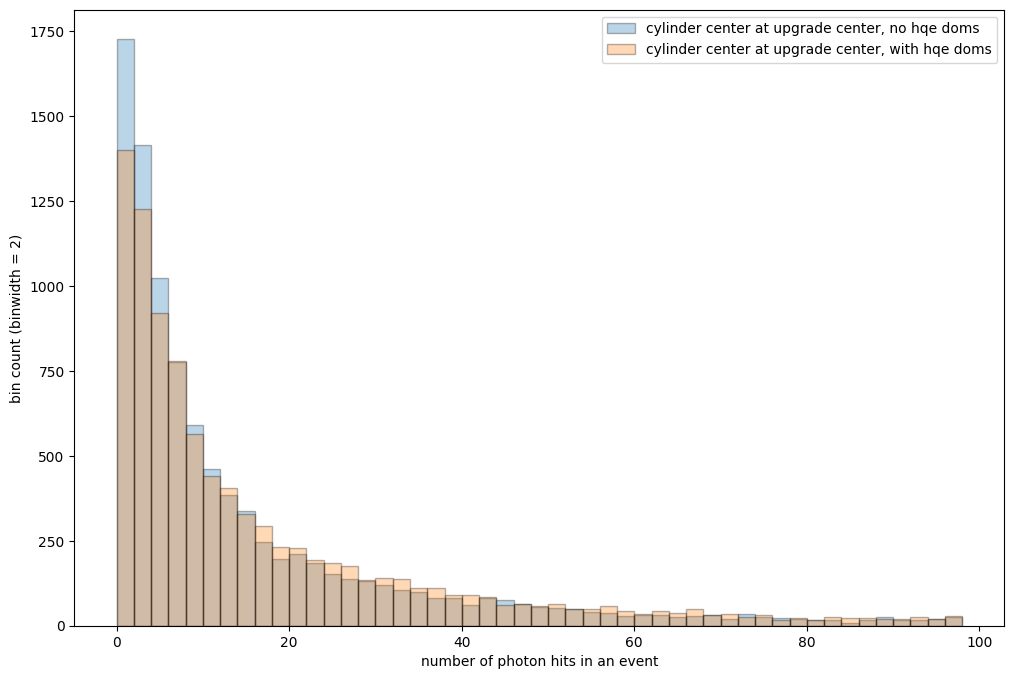

In [57]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_hits_no_hqe, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at upgrade center, no hqe doms')

plt.hist(n_hits_with_hqe, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at upgrade center, with hqe doms')
plt.xlabel('number of photon hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

[]

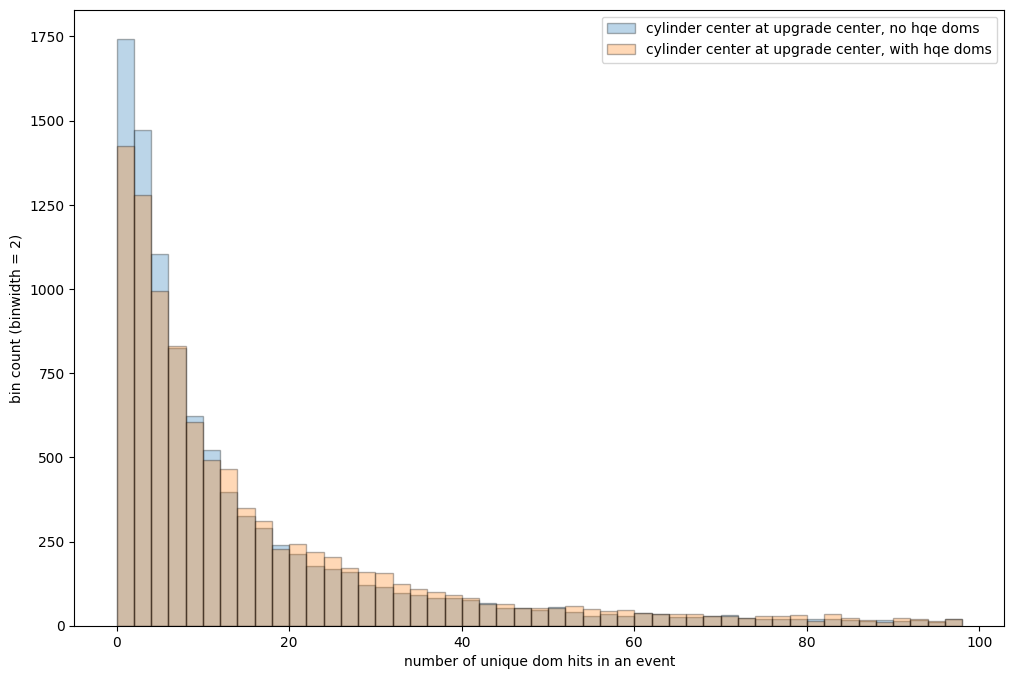

In [58]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_unique_hits_no_hqe, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at upgrade center, no hqe doms')

plt.hist(n_unique_hits_with_hqe, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at upgrade center, with hqe doms')
plt.xlabel('number of unique dom hits in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [59]:
no_hqe['mc_truth'][most_doms_hit_idx]

{'interaction': 1,
 'initial_state_energy': 86.12672555480124,
 'initial_state_type': 14,
 'initial_state_zenith': 0.2358733695495816,
 'initial_state_azimuth': -1.7723578201707995,
 'initial_state_x': 53.34614391868194,
 'initial_state_y': -41.53772316939594,
 'initial_state_z': -2419.8895443133993,
 'final_state_energy': array([4.60590795e+01, 1.68994681e-02, 4.65331143e-02, 4.22257921e-02,
        1.13581264e+01, 4.63029861e+00, 1.06590733e+01, 1.02169411e+01,
        2.21214456e+00, 7.19805454e-01, 9.54688811e-01, 1.79548881e-01,
        1.00140707e+00]),
 'final_state_type': array([  13.,   11.,   14.,  -12.,  211.,  111.,  111.,  111., 2112.,
        -211.,  211.,  211., 2112.]),
 'final_state_zenith': array([0.21189306, 1.52895276, 0.54744719, 2.84965926, 0.19236429,
        0.22751274, 0.23152257, 0.22982986, 0.17108228, 0.17133944,
        0.32076153, 1.00976017, 2.34693472]),
 'final_state_azimuth': array([-1.7575025 ,  2.26769972, -0.39028018, -2.82988835, -1.96009754,
     

In [60]:
with_hqe['mc_truth'][most_doms_hit_idx]

{'interaction': 1,
 'initial_state_energy': 86.12672555480124,
 'initial_state_type': 14,
 'initial_state_zenith': 1.7592571890682043,
 'initial_state_azimuth': 1.4009248799590408,
 'initial_state_x': 52.843296669812126,
 'initial_state_y': -127.24148303074071,
 'initial_state_z': -2113.179134999356,
 'final_state_energy': array([4.60590795e+01, 1.68994681e-02, 4.65331143e-02, 4.22257921e-02,
        1.13581264e+01, 4.63029861e+00, 1.06590733e+01, 1.02169411e+01,
        2.21214456e+00, 7.19805454e-01, 9.54688811e-01, 1.79548881e-01,
        1.00140707e+00]),
 'final_state_type': array([  13.,   11.,   14.,  -12.,  211.,  111.,  111.,  111., 2112.,
        -211.,  211.,  211., 2112.]),
 'final_state_zenith': array([1.78314755, 1.52895276, 0.54744719, 2.84965926, 1.80703147,
        1.76777424, 1.76364569, 1.76536515, 1.85448076, 1.82373534,
        1.74326927, 1.95766111, 1.38567255]),
 'final_state_azimuth': array([ 1.39695264,  2.26769972, -0.39028018, -2.82988835,  1.4360907 ,
     

In [61]:
import matplotlib.pyplot as plt
import numpy as np

def plot_icecube_event(data_dict, event_idx, geo_file_path=None, figsize=(14, 10), 
                      show_doms=True, show_arrows=True, interactive=False):
    """
    Plot an IceCube neutrino event in 3D showing detector hits, particle tracks, and geometry.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' and 'mc_truth' keys with event data
    event_idx : int
        Index of the event to plot
    geo_file_path : str, optional
        Path to the .geo file containing DOM positions
    figsize : tuple, optional
        Figure size (width, height)
    show_doms : bool, optional
        Whether to show DOM positions
    show_arrows : bool, optional
        Whether to show arrows on particle tracks
    interactive : bool, optional
        Whether to create an interactive Plotly plot (requires plotly)
    
    Returns:
    --------
    fig : matplotlib.figure.Figure or plotly.graph_objects.Figure
        The created figure object
    """
    
    # Extract photon data for the event
    photons = data_dict['photons'][event_idx]
    sensor_pos_x = photons['sensor_pos_x']
    sensor_pos_y = photons['sensor_pos_y']
    sensor_pos_z = photons['sensor_pos_z']
    sensor_t = photons['t']
    
    # Get the MC truth data for the same event
    mc_truth = data_dict['mc_truth'][event_idx]
    
    # Initial state (neutrino) position and direction
    initial_x = mc_truth['initial_state_x']
    initial_y = mc_truth['initial_state_y']
    initial_z = mc_truth['initial_state_z']
    initial_zenith = mc_truth['initial_state_zenith']
    initial_azimuth = mc_truth['initial_state_azimuth']
    
    # Find the muon (particle type 13) in final state
    muon_mask = mc_truth['final_state_type'] == 13
    muon_data = None
    if np.any(muon_mask):
        muon_idx = np.where(muon_mask)[0][0]  # Get first muon
        muon_data = {
            'energy': mc_truth['final_state_energy'][muon_idx],
            'zenith': mc_truth['final_state_zenith'][muon_idx],
            'azimuth': mc_truth['final_state_azimuth'][muon_idx],
            'x': mc_truth['final_state_x'][muon_idx],
            'y': mc_truth['final_state_y'][muon_idx],
            'z': mc_truth['final_state_z'][muon_idx]
        }
    
    # Convert spherical to Cartesian for direction vectors
    def spherical_to_cartesian(zenith, azimuth):
        """Convert zenith/azimuth angles to Cartesian direction vector"""
        x = np.sin(zenith) * np.cos(azimuth)
        y = np.sin(zenith) * np.sin(azimuth)
        z = np.cos(zenith)
        return x, y, z
    
    # Get direction vectors
    initial_dir_x, initial_dir_y, initial_dir_z = spherical_to_cartesian(initial_zenith, initial_azimuth)
    if muon_data:
        muon_dir_x, muon_dir_y, muon_dir_z = spherical_to_cartesian(muon_data['zenith'], muon_data['azimuth'])
    
    # Find 3 most energetic non-muon particles
    non_muon_mask = mc_truth['final_state_type'] != 13
    top_particles = []
    if np.any(non_muon_mask):
        non_muon_energies = mc_truth['final_state_energy'][non_muon_mask]
        non_muon_indices = np.where(non_muon_mask)[0]
        sorted_indices = np.argsort(non_muon_energies)[::-1]  # Descending order
        top_3_indices = non_muon_indices[sorted_indices[:3]]
        
        for idx in top_3_indices:
            top_particles.append({
                'type': int(mc_truth['final_state_type'][idx]),
                'energy': mc_truth['final_state_energy'][idx],
                'zenith': mc_truth['final_state_zenith'][idx],
                'azimuth': mc_truth['final_state_azimuth'][idx]
            })
    
    # PDG code to particle name mapping
    pdg_names = {
        22: 'γ', 11: 'e⁻', -11: 'e⁺', 12: 'νₑ', -12: 'ν̄ₑ', 14: 'νμ', -14: 'ν̄μ',
        211: 'π⁺', -211: 'π⁻', 111: 'π⁰', 2212: 'p', 2112: 'n', 13: 'μ⁻', -13: 'μ⁺',
    }
    
    if interactive:
        # Create interactive Plotly plot
        try:
            import plotly.graph_objects as go
        except ImportError:
            print("Plotly not installed. Falling back to matplotlib.")
            interactive = False
    
    if interactive:
        # Plotly version
        fig = go.Figure()
        
        # Get unique sensor positions and count hits per DOM
        unique_positions, inverse_indices, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_inverse=True, return_counts=True
        )
        unique_x, unique_y, unique_z = unique_positions[:, 0], unique_positions[:, 1], unique_positions[:, 2]
        
        # Get mean time for each unique DOM position
        mean_times = np.zeros(len(unique_positions))
        for i in range(len(unique_positions)):
            dom_mask = inverse_indices == i
            mean_times[i] = sensor_t[dom_mask].mean()
        
        hit_sizes = 8 + hit_counts * 2  # Scale for plotly
        
        # Add detector hits
        fig.add_trace(go.Scatter3d(
            x=unique_x, y=unique_y, z=unique_z,
            mode='markers',
            marker=dict(size=hit_sizes, color=mean_times, colorscale='viridis',
                       colorbar=dict(title="Mean Time (ns)"), opacity=0.8),
            name='Detector hits'
        ))
        
        # Add interaction vertex
        fig.add_trace(go.Scatter3d(
            x=[initial_x], y=[initial_y], z=[initial_z],
            mode='markers',
            marker=dict(size=15, color='red', symbol='x'),
            name='Interaction vertex'
        ))
        
        # Add neutrino track
        track_length = 100
        neutrino_end_x = initial_x - track_length * initial_dir_x
        neutrino_end_y = initial_y - track_length * initial_dir_y
        neutrino_end_z = initial_z - track_length * initial_dir_z
        
        fig.add_trace(go.Scatter3d(
            x=[neutrino_end_x, initial_x], y=[neutrino_end_y, initial_y], z=[neutrino_end_z, initial_z],
            mode='lines', line=dict(color='red', width=6, dash='dash'), name='Incoming neutrino'
        ))
        
        # Add muon track
        if muon_data:
            muon_track_length = min(200, muon_data['energy'] * 10)
            muon_end_x = muon_data['x'] + muon_track_length * muon_dir_x
            muon_end_y = muon_data['y'] + muon_track_length * muon_dir_y
            muon_end_z = muon_data['z'] + muon_track_length * muon_dir_z
            
            fig.add_trace(go.Scatter3d(
                x=[muon_data['x'], muon_end_x], y=[muon_data['y'], muon_end_y], z=[muon_data['z'], muon_end_z],
                mode='lines', line=dict(color='blue', width=8), name=f'μ⁻ ({muon_data["energy"]:.1f} GeV)'
            ))
        
        # Add other particles
        colors = ['green', 'orange', 'purple']
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            part_dir_x, part_dir_y, part_dir_z = spherical_to_cartesian(particle['zenith'], particle['azimuth'])
            part_length = min(150, particle['energy'] * 15)
            part_end_x = initial_x + part_length * part_dir_x
            part_end_y = initial_y + part_length * part_dir_y
            part_end_z = initial_z + part_length * part_dir_z
            
            fig.add_trace(go.Scatter3d(
                x=[initial_x, part_end_x], y=[initial_y, part_end_y], z=[initial_z, part_end_z],
                mode='lines', line=dict(color=colors[i], width=4), opacity=0.5,
                name=f'{particle_name} ({particle["energy"]:.2f} GeV)'
            ))
        
        # Add DOMs if requested
        if show_doms and geo_file_path:
            try:
                dom_data = np.loadtxt(geo_file_path, skiprows=4)
                dom_x, dom_y, dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
                
                # Filter DOMs to region
                x_min, x_max = sensor_pos_x.min(), sensor_pos_x.max()
                y_min, y_max = sensor_pos_y.min(), sensor_pos_y.max()
                z_min, z_max = sensor_pos_z.min(), sensor_pos_z.max()
                dom_mask = ((dom_x >= x_min) & (dom_x <= x_max) & 
                           (dom_y >= y_min) & (dom_y <= y_max) & 
                           (dom_z >= z_min) & (dom_z <= z_max))
                
                fig.add_trace(go.Scatter3d(
                    x=dom_x[dom_mask], y=dom_y[dom_mask], z=dom_z[dom_mask],
                    mode='markers', marker=dict(size=2, color='black', opacity=0.4), name='DOMs'
                ))
            except:
                print("Could not load DOM geometry file")
        
        # Update layout
        fig.update_layout(
            title=f'IceCube Event {event_idx} - {len(sensor_t)} hits<br>'
                  f'Initial E: {mc_truth["initial_state_energy"]:.1f} GeV',
            scene=dict(xaxis_title='X Position (m)', yaxis_title='Y Position (m)', 
                      zaxis_title='Z Position (m)', aspectmode='data'),
            width=1000, height=800
        )
        
    else:
        # Matplotlib version
        fig = plt.figure(figsize=figsize)
        ax = fig.add_subplot(projection='3d')
        
        # Get unique sensor positions and count hits per DOM
        unique_positions, inverse_indices, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_inverse=True, return_counts=True
        )
        unique_x, unique_y, unique_z = unique_positions[:, 0], unique_positions[:, 1], unique_positions[:, 2]
        
        # Get mean time for each unique DOM position
        mean_times = np.zeros(len(unique_positions))
        for i in range(len(unique_positions)):
            dom_mask = inverse_indices == i
            mean_times[i] = sensor_t[dom_mask].mean()
        
        hit_sizes = 20 + hit_counts * 10  # Base size 20, +10 per hit
        
        # Plot detector hits
        scatter = ax.scatter(unique_x, unique_y, unique_z, c=mean_times, cmap='viridis', 
                           s=hit_sizes, alpha=0.8)
        cbar = plt.colorbar(scatter, ax=ax, shrink=0.5, aspect=20)
        cbar.set_label('Mean Time (ns)', rotation=270, labelpad=15)
        
        # Plot interaction vertex
        ax.scatter(initial_x, initial_y, initial_z, c='red', s=200, marker='X', label='Interaction vertex')
        
        # Plot neutrino track
        track_length = 100
        neutrino_end_x = initial_x - track_length * initial_dir_x
        neutrino_end_y = initial_y - track_length * initial_dir_y
        neutrino_end_z = initial_z - track_length * initial_dir_z
        ax.plot([neutrino_end_x, initial_x], [neutrino_end_y, initial_y], [neutrino_end_z, initial_z], 
                'r--', linewidth=3, label='Incoming neutrino')
        
        # Plot muon track
        if muon_data:
            muon_track_length = min(200, muon_data['energy'] * 10)
            muon_end_x = muon_data['x'] + muon_track_length * muon_dir_x
            muon_end_y = muon_data['y'] + muon_track_length * muon_dir_y
            muon_end_z = muon_data['z'] + muon_track_length * muon_dir_z
            ax.plot([muon_data['x'], muon_end_x], [muon_data['y'], muon_end_y], [muon_data['z'], muon_end_z], 
                    'b-', linewidth=4, label=f'μ⁻ ({muon_data["energy"]:.1f} GeV)')
        
        # Plot other particles
        colors = ['green', 'orange', 'purple']
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            part_dir_x, part_dir_y, part_dir_z = spherical_to_cartesian(particle['zenith'], particle['azimuth'])
            part_length = min(150, particle['energy'] * 15)
            part_end_x = initial_x + part_length * part_dir_x
            part_end_y = initial_y + part_length * part_dir_y
            part_end_z = initial_z + part_length * part_dir_z
            
            ax.plot([initial_x, part_end_x], [initial_y, part_end_y], [initial_z, part_end_z], 
                    color=colors[i], linewidth=2, alpha=0.5, label=f'{particle_name} ({particle["energy"]:.2f} GeV)')
            
            # Add arrows
            if show_arrows:
                arrow_length = 20
                ax.quiver(part_end_x - arrow_length * part_dir_x, part_end_y - arrow_length * part_dir_y, 
                         part_end_z - arrow_length * part_dir_z, arrow_length * part_dir_x,
                         arrow_length * part_dir_y, arrow_length * part_dir_z,
                         color=colors[i], alpha=0.7, arrow_length_ratio=0.3)
        
        # Add DOMs if requested
        if show_doms and geo_file_path:
            try:
                dom_data = np.loadtxt(geo_file_path, skiprows=4)
                dom_x, dom_y, dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
                
                # Filter DOMs to region
                x_min, x_max = sensor_pos_x.min(), sensor_pos_x.max()
                y_min, y_max = sensor_pos_y.min(), sensor_pos_y.max()
                z_min, z_max = sensor_pos_z.min(), sensor_pos_z.max()
                dom_mask = ((dom_x >= x_min) & (dom_x <= x_max) & 
                           (dom_y >= y_min) & (dom_y <= y_max) & 
                           (dom_z >= z_min) & (dom_z <= z_max))
                
                ax.scatter(dom_x[dom_mask], dom_y[dom_mask], dom_z[dom_mask], 
                          c='black', s=8, alpha=0.4, label='DOMs')
            except:
                print("Could not load DOM geometry file")
        
        # Set axis limits based on hits
        x_margin = (sensor_pos_x.max() - sensor_pos_x.min()) * 0.1
        y_margin = (sensor_pos_y.max() - sensor_pos_y.min()) * 0.1
        z_margin = (sensor_pos_z.max() - sensor_pos_z.min()) * 0.1
        ax.set_xlim(sensor_pos_x.min() - x_margin, sensor_pos_x.max() + x_margin)
        ax.set_ylim(sensor_pos_y.min() - y_margin, sensor_pos_y.max() + y_margin)
        ax.set_zlim(sensor_pos_z.min() - z_margin, sensor_pos_z.max() + z_margin)
        
        # Labels and title
        ax.set_xlabel('X Position (m)')
        ax.set_ylabel('Y Position (m)')
        ax.set_zlabel('Z Position (m)')
        title = f'IceCube Event {event_idx} - {len(sensor_t)} hits\n'
        title += f'Initial E: {mc_truth["initial_state_energy"]:.1f} GeV'
        # if muon_data:
        #     title += f', Muon E: {muon_data["energy"]:.1f} GeV'
        ax.set_title(title)
        
        # Add legend
        ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
        ax.view_init(elev=20, azim=45)
        plt.tight_layout()
    
    # Print event information
    print(f"Event {event_idx} Summary:")
    print(f"  Total hits: {len(sensor_t)}")
    print(f"  Interaction vertex: ({initial_x:.1f}, {initial_y:.1f}, {initial_z:.1f}) m")
    print(f"  Initial neutrino energy: {mc_truth['initial_state_energy']:.1f} GeV")
    print(f"  Zenith: {np.degrees(initial_zenith):.1f}°, Azimuth: {np.degrees(initial_azimuth):.1f}°")
    if muon_data:
        print(f"  Muon energy: {muon_data['energy']:.1f} GeV")
        scattering_angle = np.degrees(np.arccos(
            np.cos(initial_zenith)*np.cos(muon_data['zenith']) + 
            np.sin(initial_zenith)*np.sin(muon_data['zenith'])*np.cos(initial_azimuth-muon_data['azimuth'])
        ))
        print(f"  Scattering angle: {scattering_angle:.1f}°")
    
    if top_particles:
        print("  Top 3 most energetic non-muon particles:")
        for i, particle in enumerate(top_particles):
            if i >= 3: break
            particle_name = pdg_names.get(particle['type'], f'PDG{particle["type"]}')
            print(f"    {i+1}. {particle_name} (PDG {particle['type']}): {particle['energy']:.2f} GeV")
    
    return fig

# Example usage:
# fig = plot_icecube_event(deepcore_out, max_hits_idx, 
#                         geo_file_path='../resources/geofiles/icecube.geo',
#                         interactive=True)
# fig.show()  # For plotly
# plt.show()  # For matplotlib

Event 2650 Summary:
  Total hits: 807
  Interaction vertex: (53.3, -41.5, -2419.9) m
  Initial neutrino energy: 86.1 GeV
  Zenith: 13.5°, Azimuth: -101.5°
  Muon energy: 46.1 GeV
  Scattering angle: 1.4°
  Top 3 most energetic non-muon particles:
    1. π⁺ (PDG 211): 11.36 GeV
    2. π⁰ (PDG 111): 10.66 GeV
    3. π⁰ (PDG 111): 10.22 GeV


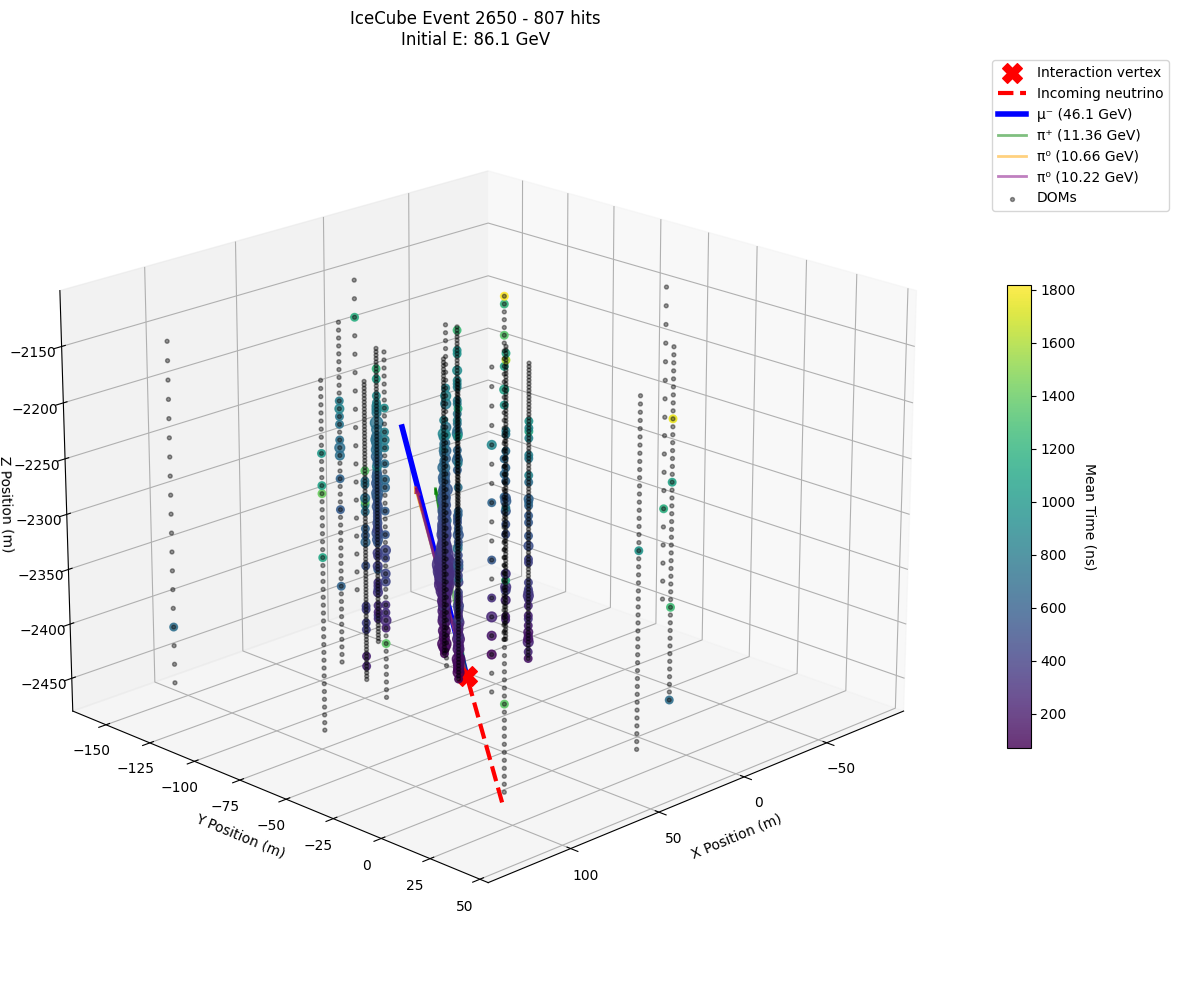

In [62]:
fig = plot_icecube_event(no_hqe, most_doms_hit_idx, 
                        geo_file_path='/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
                        interactive=False)
fig.show()  # For plotly
plt.show()  # For matplotlib

In [63]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict

def create_dom_heatmap(data_dict, geo_file_path=None):
    """
    Create a heatmap showing total hits per DOM across all events.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' data
    geo_file_path : str, optional
        Path to the .geo file containing DOM positions
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    dom_hit_counts : dict
        Dictionary mapping DOM positions to hit counts
    """
    
    # Dictionary to store total hits per DOM position
    dom_hit_counts = defaultdict(int)
    
    print("Processing events to count hits per DOM...")
    
    # Go through all events
    n_events = len(data_dict['photons'])
    for event_idx in range(n_events):
        if event_idx % 100 == 0:  # Progress indicator
            print(f"Processing event {event_idx}/{n_events}")
        
        # Get sensor positions for this event
        photons = data_dict['photons'][event_idx]
        sensor_pos_x = photons['sensor_pos_x']
        sensor_pos_y = photons['sensor_pos_y']
        sensor_pos_z = photons['sensor_pos_z']
        
        # Count hits per unique DOM position in this event
        unique_positions, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_counts=True
        )
        
        # Add to total count for each DOM
        for pos, count in zip(unique_positions, hit_counts):
            # Use tuple as key for DOM position
            dom_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
            dom_hit_counts[dom_key] += count
    
    print(f"Finished processing {n_events} events")
    print(f"Found hits on {len(dom_hit_counts)} unique DOM positions")
    
    # Convert to arrays for plotting
    dom_positions = np.array(list(dom_hit_counts.keys()))
    hit_counts = np.array(list(dom_hit_counts.values()))
    
    # Extract coordinates
    dom_x = dom_positions[:, 0]
    dom_y = dom_positions[:, 1]
    dom_z = dom_positions[:, 2]
    
    # Create the plot
    fig = plt.figure(figsize=(15, 12))
    
    # 3D scatter plot
    ax1 = fig.add_subplot(221, projection='3d')
    scatter = ax1.scatter(dom_x, dom_y, dom_z, c=hit_counts, 
                         cmap='hot', s=60, alpha=0.8)
    ax1.set_xlabel('X Position (m)')
    ax1.set_ylabel('Y Position (m)')
    ax1.set_zlabel('Z Position (m)')
    ax1.set_title('3D DOM Hit Distribution')
    cbar1 = plt.colorbar(scatter, ax=ax1, shrink=0.5, aspect=20)
    cbar1.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Top view (X-Y plane)
    ax2 = fig.add_subplot(222)
    scatter2 = ax2.scatter(dom_x, dom_y, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax2.set_xlabel('X Position (m)')
    ax2.set_ylabel('Y Position (m)')
    ax2.set_title('Top View (X-Y Plane)')
    ax2.set_aspect('equal')
    cbar2 = plt.colorbar(scatter2, ax=ax2)
    cbar2.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Side view (X-Z plane)
    ax3 = fig.add_subplot(223)
    scatter3 = ax3.scatter(dom_x, dom_z, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax3.set_xlabel('X Position (m)')
    ax3.set_ylabel('Z Position (m)')
    ax3.set_title('Side View (X-Z Plane)')
    ax3.set_aspect('equal')
    cbar3 = plt.colorbar(scatter3, ax=ax3)
    cbar3.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Front view (Y-Z plane)
    ax4 = fig.add_subplot(224)
    scatter4 = ax4.scatter(dom_y, dom_z, c=hit_counts, cmap='hot', s=60, alpha=0.8)
    ax4.set_xlabel('Y Position (m)')
    ax4.set_ylabel('Z Position (m)')
    ax4.set_title('Front View (Y-Z Plane)')
    ax4.set_aspect('equal')
    cbar4 = plt.colorbar(scatter4, ax=ax4)
    cbar4.set_label('Total Hits', rotation=270, labelpad=15)
    
    plt.tight_layout()
    
    # Print statistics
    print(f"\nDOM Hit Statistics:")
    print(f"Total DOMs with hits: {len(dom_hit_counts)}")
    print(f"Total hits across all events: {hit_counts.sum()}")
    print(f"Average hits per DOM: {hit_counts.mean():.1f}")
    print(f"Max hits on single DOM: {hit_counts.max()}")
    print(f"Min hits on single DOM: {hit_counts.min()}")
    
    # Find the hottest DOMs
    top_indices = np.argsort(hit_counts)[-10:][::-1]  # Top 10
    print(f"\nTop 10 most active DOMs:")
    for i, idx in enumerate(top_indices):
        pos = dom_positions[idx]
        hits = hit_counts[idx]
        print(f"{i+1:2d}. Position ({pos[0]:7.1f}, {pos[1]:7.1f}, {pos[2]:7.1f}): {hits:5d} hits")
    
    return fig, dom_hit_counts

def create_string_dom_heatmap(data_dict, geo_file_path):
    """
    Create a heatmap using string and DOM numbers from geometry file.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' data
    geo_file_path : str
        Path to the .geo file containing DOM positions
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """
    
    # Load DOM geometry
    try:
        dom_data = np.loadtxt(geo_file_path, skiprows=4)
        geo_dom_x, geo_dom_y, geo_dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
        geo_string_nums = dom_data[:, 3].astype(int)
        geo_dom_nums = dom_data[:, 4].astype(int)
        
        print(f"Loaded {len(dom_data)} DOMs from geometry file")
        print(f"String numbers range: {geo_string_nums.min()} to {geo_string_nums.max()}")
        print(f"DOM numbers range: {geo_dom_nums.min()} to {geo_dom_nums.max()}")
        
    except:
        print("Error loading geometry file")
        return None, None
    
    # Create mapping from position to string/DOM number
    pos_to_string_dom = {}
    for x, y, z, string_num, dom_num in zip(geo_dom_x, geo_dom_y, geo_dom_z, 
                                           geo_string_nums, geo_dom_nums):
        key = (round(x, 2), round(y, 2), round(z, 2))
        pos_to_string_dom[key] = (string_num, dom_num)
    
    # Dictionary to store total hits per string/DOM
    string_dom_hits = defaultdict(int)
    
    print("Processing events to count hits per string/DOM...")
    
    # Go through all events
    n_events = len(data_dict['photons'])
    for event_idx in range(n_events):
        if event_idx % 100 == 0:
            print(f"Processing event {event_idx}/{n_events}")
        
        # Get sensor positions for this event
        photons = data_dict['photons'][event_idx]
        sensor_pos_x = photons['sensor_pos_x']
        sensor_pos_y = photons['sensor_pos_y']
        sensor_pos_z = photons['sensor_pos_z']
        
        # Count hits per unique DOM position in this event
        unique_positions, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_counts=True
        )
        
        # Map to string/DOM numbers and add to count
        for pos, count in zip(unique_positions, hit_counts):
            pos_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
            if pos_key in pos_to_string_dom:
                string_num, dom_num = pos_to_string_dom[pos_key]
                string_dom_hits[(string_num, dom_num)] += count
    
    # Convert to matrix format for heatmap
    string_nums = sorted(set([s for s, d in string_dom_hits.keys()]))
    dom_nums = sorted(set([d for s, d in string_dom_hits.keys()]))
    
    # Create hit matrix
    hit_matrix = np.zeros((len(dom_nums), len(string_nums)))
    for (string_num, dom_num), hits in string_dom_hits.items():
        string_idx = string_nums.index(string_num)
        dom_idx = dom_nums.index(dom_num)
        hit_matrix[dom_idx, string_idx] = hits
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(hit_matrix, cmap='hot', aspect='auto', origin='upper')
    
    # Set labels
    ax.set_xticks(range(len(string_nums)))
    ax.set_xticklabels(string_nums)
    ax.set_yticks(range(len(dom_nums)))
    ax.set_yticklabels(dom_nums)
    
    ax.set_xlabel('String Number')
    ax.set_ylabel('DOM Number')
    ax.set_title('DOM Hit Heatmap by String and DOM Number')
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Total Hits', rotation=270, labelpad=15)
    
    # Add text annotations for non-zero values (optional, might be too crowded)
    # for i in range(len(dom_nums)):
    #     for j in range(len(string_nums)):
    #         if hit_matrix[i, j] > 0:
    #             text = ax.text(j, i, int(hit_matrix[i, j]),
    #                           ha="center", va="center", color="white", fontsize=8)
    
    plt.tight_layout()
    
    print(f"Created heatmap with {len(string_nums)} strings and {len(dom_nums)} DOMs")
    print(f"Total hits: {hit_matrix.sum()}")
    
    return fig, string_dom_hits

# Usage examples:
# fig1, dom_counts = create_dom_heatmap(deepcore_out)
# plt.show()

# fig2, string_dom_counts = 
# (deepcore_out, '../resources/geofiles/icecube.geo')
# plt.show()

Loaded 5783 DOMs from geometry file
String numbers range: 1 to 93
DOM numbers range: 1 to 89
Processing events to count hits per string/DOM...
Processing event 0/50000
Processing event 100/50000
Processing event 200/50000
Processing event 300/50000
Processing event 400/50000
Processing event 500/50000
Processing event 600/50000
Processing event 700/50000
Processing event 800/50000
Processing event 900/50000
Processing event 1000/50000
Processing event 1100/50000
Processing event 1200/50000
Processing event 1300/50000
Processing event 1400/50000
Processing event 1500/50000
Processing event 1600/50000
Processing event 1700/50000
Processing event 1800/50000
Processing event 1900/50000
Processing event 2000/50000
Processing event 2100/50000
Processing event 2200/50000
Processing event 2300/50000
Processing event 2400/50000
Processing event 2500/50000
Processing event 2600/50000
Processing event 2700/50000
Processing event 2800/50000
Processing event 2900/50000
Processing event 3000/50000
P

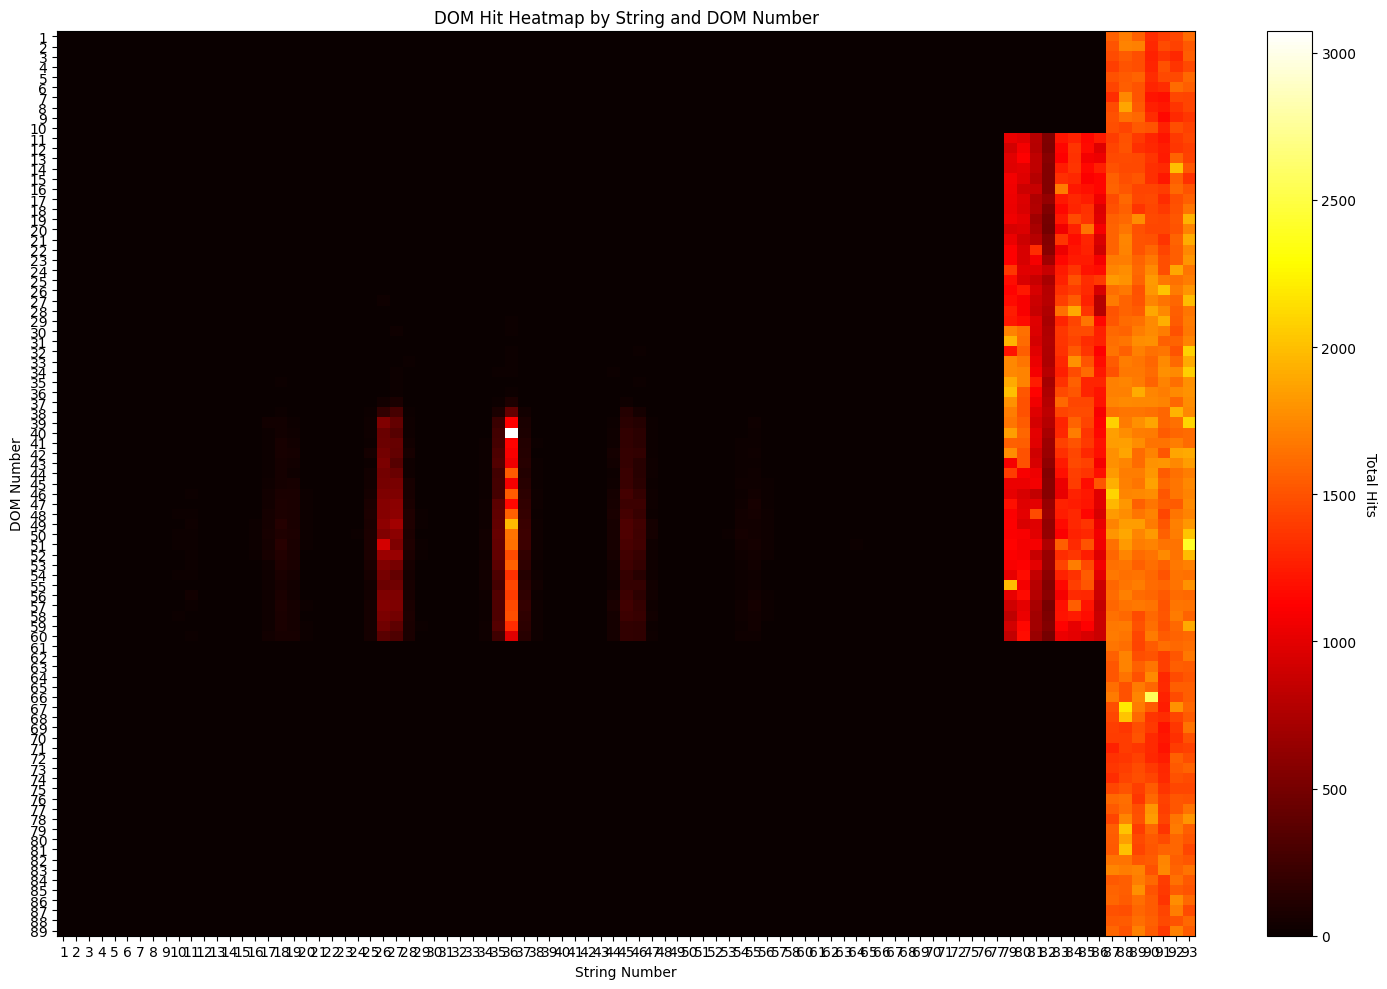

In [64]:
fig2, string_dom_counts = create_string_dom_heatmap(with_hqe, '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo')
plt.show()

In [65]:
def create_filtered_string_dom_heatmap(data_dict, geo_file_path, target_strings=None):
    """
    Create a heatmap using string and DOM numbers from geometry file, 
    filtered to only show specific strings.
    
    Parameters:
    -----------
    data_dict : dict
        Dictionary containing 'photons' data
    geo_file_path : str
        Path to the .geo file containing DOM positions
    target_strings : list, optional
        List of string numbers to include. If None, includes all strings.
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    """
    
    # Default target strings: 36 and 78-93
    if target_strings is None:
        target_strings = [36] + list(range(78, 94))  # 78-93 inclusive
    
    print(f"Target strings: {target_strings}")
    
    # Load DOM geometry
    try:
        dom_data = np.loadtxt(geo_file_path, skiprows=4)
        geo_dom_x, geo_dom_y, geo_dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
        geo_string_nums = dom_data[:, 3].astype(int)
        geo_dom_nums = dom_data[:, 4].astype(int)
        
        print(f"Loaded {len(dom_data)} DOMs from geometry file")
        
        # Filter to only target strings
        target_mask = np.isin(geo_string_nums, target_strings)
        filtered_indices = np.where(target_mask)[0]
        
        print(f"Found {len(filtered_indices)} DOMs on target strings")
        
    except:
        print("Error loading geometry file")
        return None, None
    
    # Create mapping from position to string/DOM number (only for target strings)
    pos_to_string_dom = {}
    for idx in filtered_indices:
        x, y, z = geo_dom_x[idx], geo_dom_y[idx], geo_dom_z[idx]
        string_num, dom_num = geo_string_nums[idx], geo_dom_nums[idx]
        key = (round(x, 2), round(y, 2), round(z, 2))
        pos_to_string_dom[key] = (string_num, dom_num)
    
    # Dictionary to store total hits per string/DOM
    string_dom_hits = defaultdict(int)
    
    print("Processing events to count hits per string/DOM...")
    
    # Go through all events
    n_events = len(data_dict['photons'])
    for event_idx in range(n_events):
        if event_idx % 100 == 0:
            print(f"Processing event {event_idx}/{n_events}")
        
        # Get sensor positions for this event
        photons = data_dict['photons'][event_idx]
        sensor_pos_x = photons['sensor_pos_x']
        sensor_pos_y = photons['sensor_pos_y']
        sensor_pos_z = photons['sensor_pos_z']
        
        # Count hits per unique DOM position in this event
        unique_positions, hit_counts = np.unique(
            np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
            axis=0, return_counts=True
        )
        
        # Map to string/DOM numbers and add to count (only for target strings)
        for pos, count in zip(unique_positions, hit_counts):
            pos_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
            if pos_key in pos_to_string_dom:
                string_num, dom_num = pos_to_string_dom[pos_key]
                string_dom_hits[(string_num, dom_num)] += count
    
    if not string_dom_hits:
        print("No hits found on target strings!")
        return None, None
    
    # Convert to matrix format for heatmap
    string_nums = sorted(set([s for s, d in string_dom_hits.keys()]))
    dom_nums = sorted(set([d for s, d in string_dom_hits.keys()]))
    
    print(f"Active strings: {string_nums}")
    print(f"DOM range: {min(dom_nums)} to {max(dom_nums)}")
    
    # Create hit matrix
    hit_matrix = np.zeros((len(dom_nums), len(string_nums)))
    for (string_num, dom_num), hits in string_dom_hits.items():
        string_idx = string_nums.index(string_num)
        dom_idx = dom_nums.index(dom_num)
        hit_matrix[dom_idx, string_idx] = hits
    
    # Create heatmap
    fig, ax = plt.subplots(figsize=(15, 10))
    im = ax.imshow(hit_matrix, cmap='hot', aspect='auto', origin='upper')
    
    # Set labels
    ax.set_xticks(range(len(string_nums)))
    ax.set_xticklabels(string_nums)
    ax.set_yticks(range(len(dom_nums)))
    ax.set_yticklabels(dom_nums)
    
    ax.set_xlabel('String Number')
    ax.set_ylabel('DOM Number')
    ax.set_title(f'DOM Hit Heatmap - Strings {target_strings}')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=ax)
    cbar.set_label('Total Hits', rotation=270, labelpad=15)
    
    plt.tight_layout()
    
    print(f"Created heatmap with {len(string_nums)} strings and {len(dom_nums)} DOMs")
    print(f"Total hits on target strings: {hit_matrix.sum()}")
    
    return fig, string_dom_hits

# Usage:
# target_strings = [36] + list(range(78, 94))  # 36 and 78-93
# fig2, string_dom_counts = create_filtered_string_dom_heatmap(
#     with_hqe, 
#     '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
#     target_strings=target_strings
# )
# plt.show()

Target strings: [36, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
Loaded 5783 DOMs from geometry file
Found 1223 DOMs on target strings
Processing events to count hits per string/DOM...
Processing event 0/10000
Processing event 100/10000
Processing event 200/10000
Processing event 300/10000
Processing event 400/10000
Processing event 500/10000
Processing event 600/10000
Processing event 700/10000
Processing event 800/10000
Processing event 900/10000
Processing event 1000/10000
Processing event 1100/10000
Processing event 1200/10000
Processing event 1300/10000
Processing event 1400/10000
Processing event 1500/10000
Processing event 1600/10000
Processing event 1700/10000
Processing event 1800/10000
Processing event 1900/10000
Processing event 2000/10000
Processing event 2100/10000
Processing event 2200/10000
Processing event 2300/10000
Processing event 2400/10000
Processing event 2500/10000
Processing event 2600/10000
Processing event 2700/10000
Processing event 2800/1

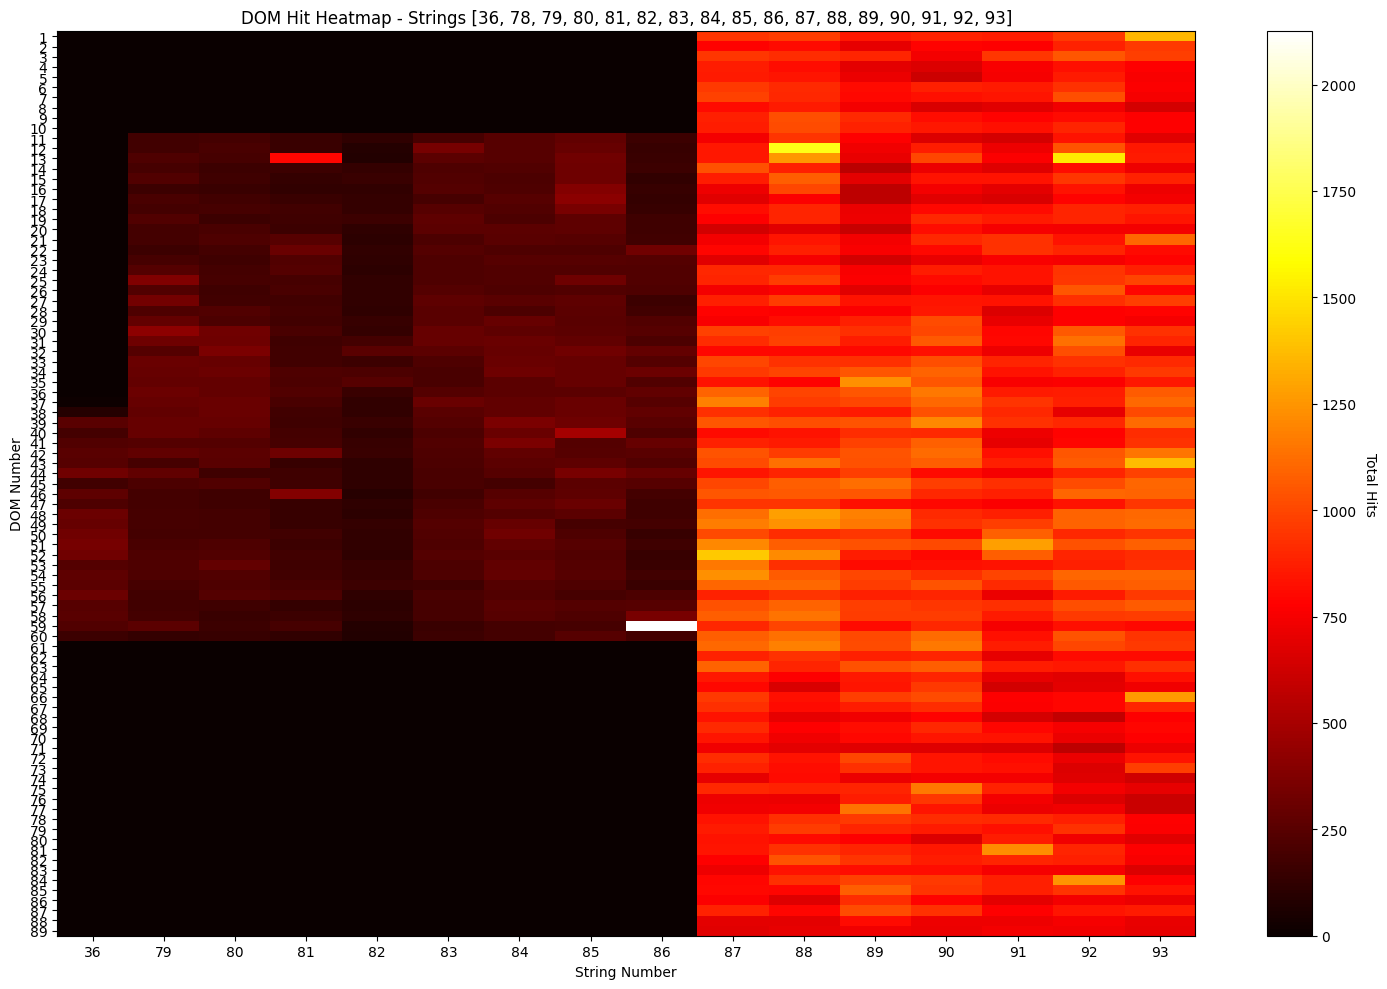

In [20]:
target_strings = [36] + list(range(78, 94))  # 36 and 78-93
fig2, string_dom_counts = create_filtered_string_dom_heatmap(
    with_hqe, 
    '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
    target_strings=target_strings
)
plt.show()

Target strings: [36, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
Loaded 5783 DOMs from geometry file
Found 1223 DOMs on target strings
Processing events to count hits per string/DOM...
Processing event 0/10000
Processing event 100/10000
Processing event 200/10000
Processing event 300/10000
Processing event 400/10000
Processing event 500/10000
Processing event 600/10000
Processing event 700/10000
Processing event 800/10000
Processing event 900/10000
Processing event 1000/10000
Processing event 1100/10000
Processing event 1200/10000
Processing event 1300/10000
Processing event 1400/10000
Processing event 1500/10000
Processing event 1600/10000
Processing event 1700/10000
Processing event 1800/10000
Processing event 1900/10000
Processing event 2000/10000
Processing event 2100/10000
Processing event 2200/10000
Processing event 2300/10000
Processing event 2400/10000
Processing event 2500/10000
Processing event 2600/10000
Processing event 2700/10000
Processing event 2800/1

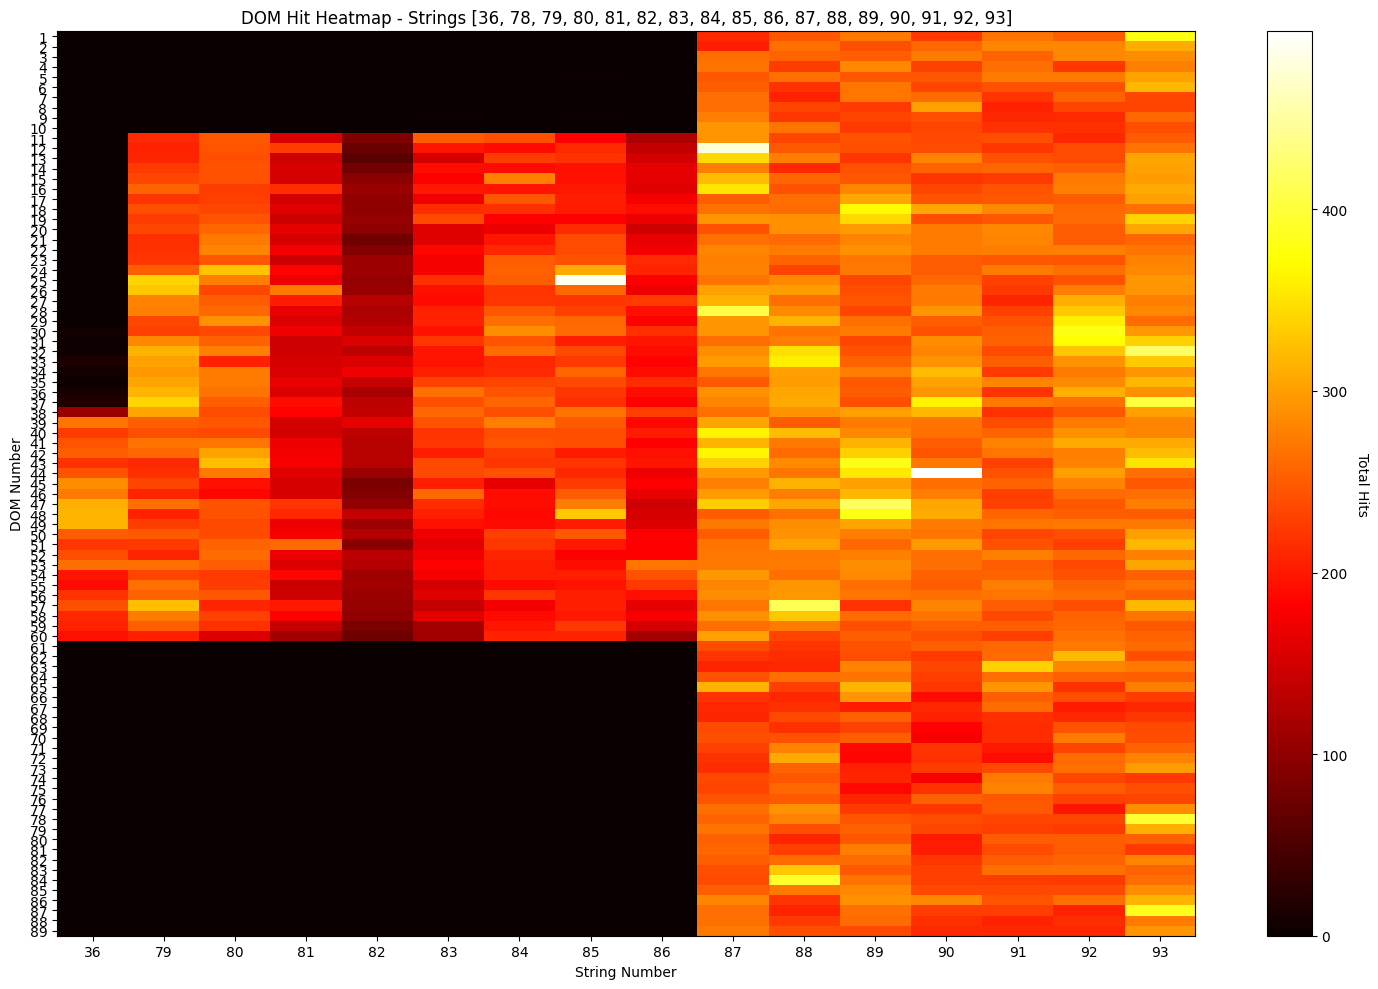

In [21]:
target_strings = [36] + list(range(78, 94))  # 36 and 78-93
fig2, string_dom_counts = create_filtered_string_dom_heatmap(
    no_hqe, 
    '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
    target_strings=target_strings
)
plt.show()

In [71]:
def create_hqe_ratio_heatmap(data_dict_hqe, data_dict_no_hqe, geo_file_path, target_strings=None, min_hits_threshold=50):
    """
    Create a heatmap showing the ratio of hits between HQE and no-HQE datasets,
    filtered to only show specific strings and DOMs with sufficient hits.
    
    Parameters:
    -----------
    data_dict_hqe : dict
        Dictionary containing 'photons' data with HQE
    data_dict_no_hqe : dict
        Dictionary containing 'photons' data without HQE
    geo_file_path : str
        Path to the .geo file containing DOM positions
    target_strings : list, optional
        List of string numbers to include. If None, includes [36] + [78-93]
    min_hits_threshold : int, optional
        Minimum number of hits required (in no_hqe dataset) to include DOM in ratio plot
    
    Returns:
    --------
    fig : matplotlib.figure.Figure
        The created figure object
    ratio_data : dict
        Dictionary containing ratio data for each DOM
    """
    
    # Default target strings: 36 and 78-93
    if target_strings is None:
        target_strings = [36] + list(range(78, 94))
    
    print(f"Target strings: {target_strings}")
    print(f"Minimum hits threshold: {min_hits_threshold}")
    
    # Load DOM geometry
    try:
        dom_data = np.loadtxt(geo_file_path, skiprows=4)
        geo_dom_x, geo_dom_y, geo_dom_z = dom_data[:, 0], dom_data[:, 1], dom_data[:, 2]
        geo_string_nums = dom_data[:, 3].astype(int)
        geo_dom_nums = dom_data[:, 4].astype(int)
        
        # Filter to only target strings
        target_mask = np.isin(geo_string_nums, target_strings)
        filtered_indices = np.where(target_mask)[0]
        
        print(f"Found {len(filtered_indices)} DOMs on target strings")
        
    except:
        print("Error loading geometry file")
        return None, None
    
    # Create mapping from position to string/DOM number
    pos_to_string_dom = {}
    for idx in filtered_indices:
        x, y, z = geo_dom_x[idx], geo_dom_y[idx], geo_dom_z[idx]
        string_num, dom_num = geo_string_nums[idx], geo_dom_nums[idx]
        key = (round(x, 2), round(y, 2), round(z, 2))
        pos_to_string_dom[key] = (string_num, dom_num)
    
    # Function to count hits per DOM
    def count_hits_per_dom(data_dict, description):
        string_dom_hits = defaultdict(int)
        n_events = len(data_dict['photons'])
        
        print(f"Processing {description} - {n_events} events...")
        
        for event_idx in range(n_events):
            if event_idx % 100 == 0:
                print(f"  Processing event {event_idx}/{n_events}")
            
            photons = data_dict['photons'][event_idx]
            sensor_pos_x = photons['sensor_pos_x']
            sensor_pos_y = photons['sensor_pos_y']
            sensor_pos_z = photons['sensor_pos_z']
            
            unique_positions, hit_counts = np.unique(
                np.column_stack((sensor_pos_x, sensor_pos_y, sensor_pos_z)),
                axis=0, return_counts=True
            )
            
            for pos, count in zip(unique_positions, hit_counts):
                pos_key = (round(pos[0], 2), round(pos[1], 2), round(pos[2], 2))
                if pos_key in pos_to_string_dom:
                    string_num, dom_num = pos_to_string_dom[pos_key]
                    string_dom_hits[(string_num, dom_num)] += count
        
        return string_dom_hits
    
    # Count hits for both datasets
    hqe_hits = count_hits_per_dom(data_dict_hqe, "HQE dataset")
    no_hqe_hits = count_hits_per_dom(data_dict_no_hqe, "No-HQE dataset")
    
    print(f"HQE dataset: {len(hqe_hits)} active DOMs, {sum(hqe_hits.values())} total hits")
    print(f"No-HQE dataset: {len(no_hqe_hits)} active DOMs, {sum(no_hqe_hits.values())} total hits")
    
    # Calculate ratios for DOMs that meet the threshold
    ratio_data = {}
    filtered_doms = []
    
    for (string_num, dom_num) in no_hqe_hits.keys():
        no_hqe_count = no_hqe_hits[(string_num, dom_num)]
        
        # Only include DOMs with sufficient hits in no_hqe dataset
        if no_hqe_count >= min_hits_threshold:
            hqe_count = hqe_hits.get((string_num, dom_num), 0)
            
            # Calculate ratio (HQE / no_HQE)
            if no_hqe_count > 0:
                ratio = hqe_count / no_hqe_count
                ratio_data[(string_num, dom_num)] = {
                    'ratio': ratio,
                    'hqe_hits': hqe_count,
                    'no_hqe_hits': no_hqe_count
                }
                filtered_doms.append((string_num, dom_num))
    
    print(f"DOMs meeting threshold ({min_hits_threshold}+ hits): {len(filtered_doms)}")
    
    if not filtered_doms:
        print("No DOMs meet the minimum hits threshold!")
        return None, None
    
    # Create matrix for heatmap
    string_nums = sorted(set([s for s, d in filtered_doms]))
    dom_nums = sorted(set([d for s, d in filtered_doms]))
    
    print(f"Active strings: {string_nums}")
    print(f"DOM range: {min(dom_nums)} to {max(dom_nums)}")
    
    # Create ratio matrix
    ratio_matrix = np.full((len(dom_nums), len(string_nums)), np.nan)
    
    for (string_num, dom_num) in filtered_doms:
        string_idx = string_nums.index(string_num)
        dom_idx = dom_nums.index(dom_num)
        ratio_matrix[dom_idx, string_idx] = ratio_data[(string_num, dom_num)]['ratio']
    
    # Create heatmap
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
    
    # Ratio heatmap
    im1 = ax1.imshow(ratio_matrix, cmap='RdYlBu_r', aspect='auto', origin='upper', vmin=0.5, vmax=1.5)
    ax1.set_xticks(range(len(string_nums)))
    ax1.set_xticklabels(string_nums)
    ax1.set_yticks(range(len(dom_nums)))
    ax1.set_yticklabels(dom_nums)
    ax1.set_xlabel('String Number')
    ax1.set_ylabel('DOM Number')
    ax1.set_title(f'HQE/No-HQE Hit Ratio (min {min_hits_threshold} hits)')
    
    cbar1 = plt.colorbar(im1, ax=ax1)
    cbar1.set_label('HQE / No-HQE Ratio', rotation=270, labelpad=15)
    
    # Add horizontal line at ratio = 1
    ax1.axhline(y=-0.5, color='white', linestyle='-', linewidth=2, alpha=0.7)
    
    # Histogram of ratios
    ratios = [data['ratio'] for data in ratio_data.values()]
    ax2.hist(ratios, bins=30, alpha=0.7, edgecolor='black')
    ax2.axvline(x=1.0, color='red', linestyle='--', linewidth=2, label='Ratio = 1.0')
    ax2.set_xlabel('HQE / No-HQE Ratio')
    ax2.set_ylabel('Number of DOMs')
    ax2.set_title('Distribution of Hit Ratios')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    # Print statistics
    ratios_array = np.array(ratios)
    print(f"\nRatio Statistics:")
    print(f"Mean ratio: {ratios_array.mean():.3f}")
    print(f"Median ratio: {np.median(ratios_array):.3f}")
    print(f"Std ratio: {ratios_array.std():.3f}")
    print(f"Min ratio: {ratios_array.min():.3f}")
    print(f"Max ratio: {ratios_array.max():.3f}")
    
    # Find extreme ratios
    high_ratio_doms = [(s, d) for (s, d) in filtered_doms if ratio_data[(s, d)]['ratio'] > 1.5]
    low_ratio_doms = [(s, d) for (s, d) in filtered_doms if ratio_data[(s, d)]['ratio'] < 0.7]
    
    print(f"\nDOMs with high ratios (>1.5): {len(high_ratio_doms)}")
    print(f"DOMs with low ratios (<0.7): {len(low_ratio_doms)}")
    
    return fig, ratio_data

# Usage:
# target_strings = [36] + list(range(78, 94))
# fig_ratio, ratio_data = create_hqe_ratio_heatmap(
#     with_hqe, 
#     no_hqe,
#     '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
#     target_strings=target_strings,
#     min_hits_threshold=50  # Adjust this threshold as needed
# )
# plt.show()

Target strings: [36, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93]
Minimum hits threshold: 5
Found 1223 DOMs on target strings
Processing HQE dataset - 50000 events...
  Processing event 0/50000
  Processing event 100/50000
  Processing event 200/50000
  Processing event 300/50000
  Processing event 400/50000
  Processing event 500/50000
  Processing event 600/50000
  Processing event 700/50000
  Processing event 800/50000
  Processing event 900/50000
  Processing event 1000/50000
  Processing event 1100/50000
  Processing event 1200/50000
  Processing event 1300/50000
  Processing event 1400/50000
  Processing event 1500/50000
  Processing event 1600/50000
  Processing event 1700/50000
  Processing event 1800/50000
  Processing event 1900/50000
  Processing event 2000/50000
  Processing event 2100/50000
  Processing event 2200/50000
  Processing event 2300/50000
  Processing event 2400/50000
  Processing event 2500/50000
  Processing event 2600/50000
  Processing eve

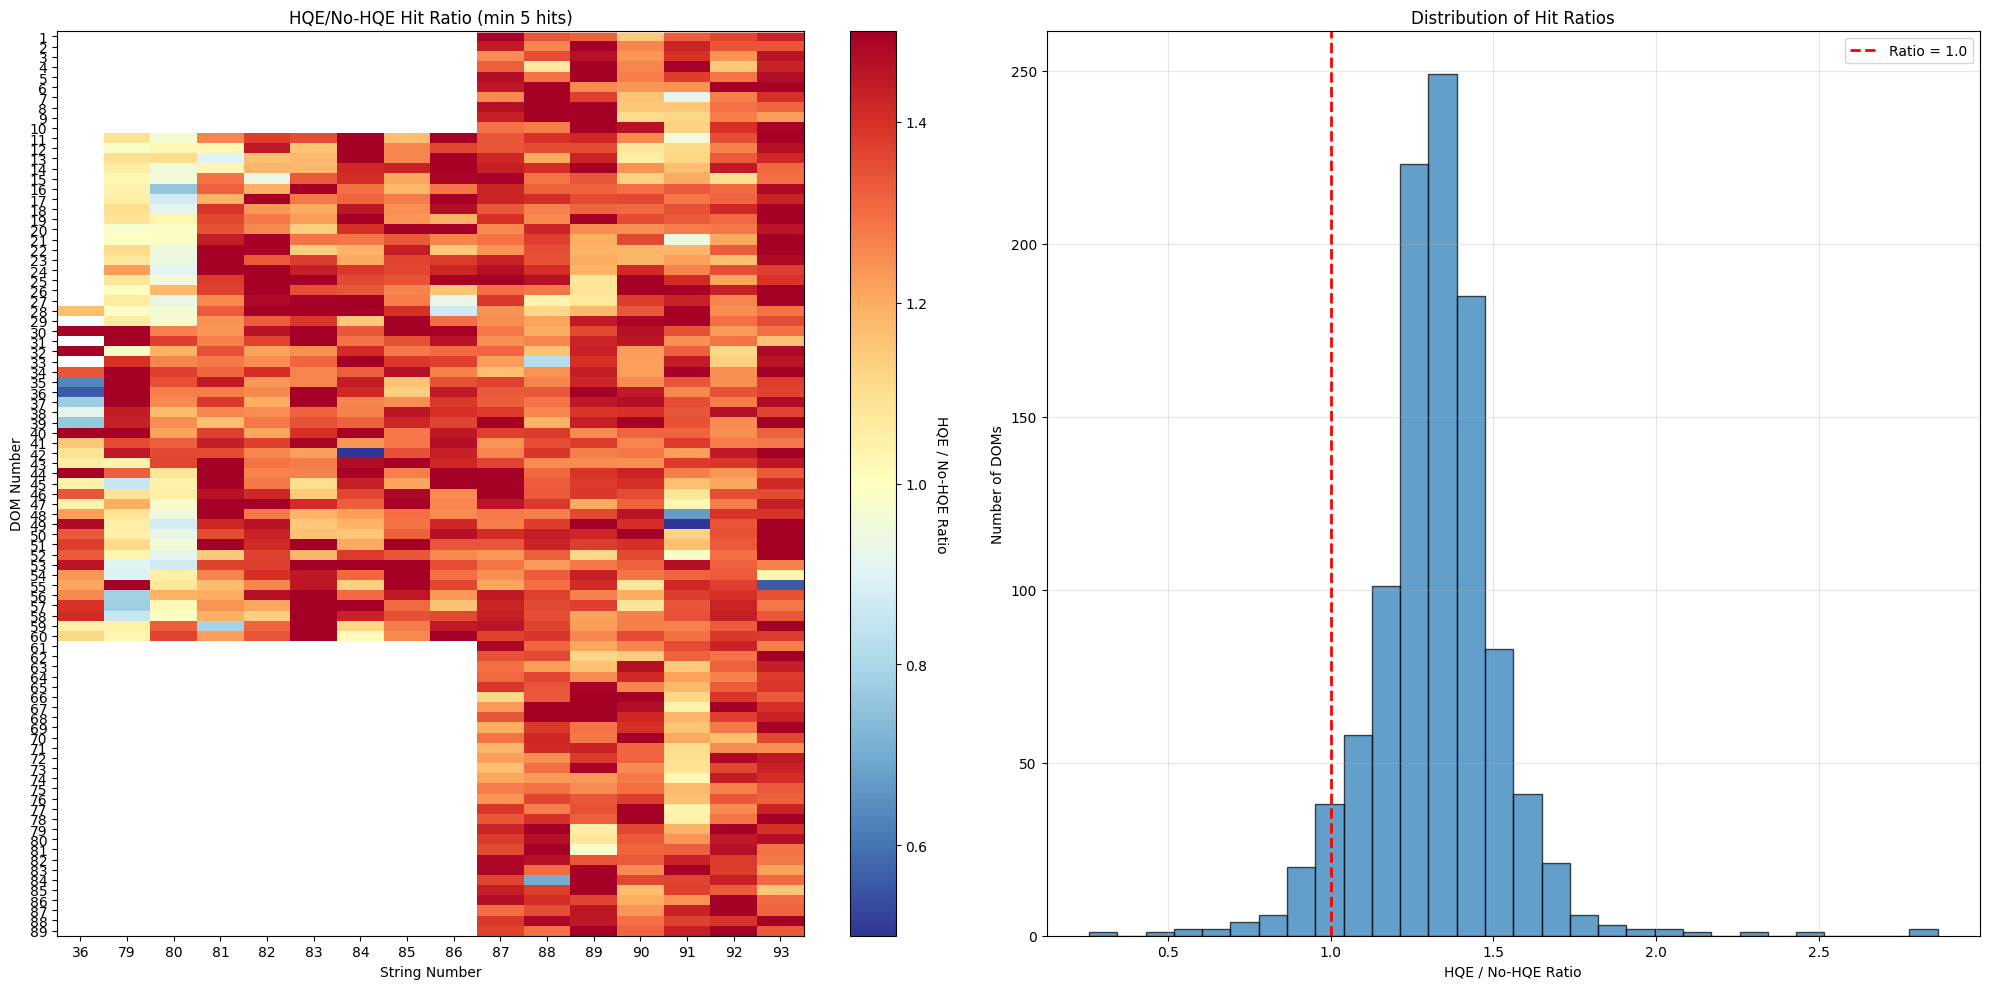

In [72]:
target_strings = [36] + list(range(78, 94))
fig_ratio, ratio_data = create_hqe_ratio_heatmap(
    with_hqe, 
    no_hqe,
    '/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',
    target_strings=target_strings,
    min_hits_threshold=5  # Adjust this threshold as needed
)
plt.show()

In [ ]:
fig2, string_dom_counts = create_string_dom_heatmap(no_hqe, most_doms_hit_idx, 
                        geo_file_path='/groups/icecube/jackp/prometheus_genie_cleaned/harvard-prometheus/resources/geofiles/icecube_upgrade_new.geo',)
plt.show()

[]

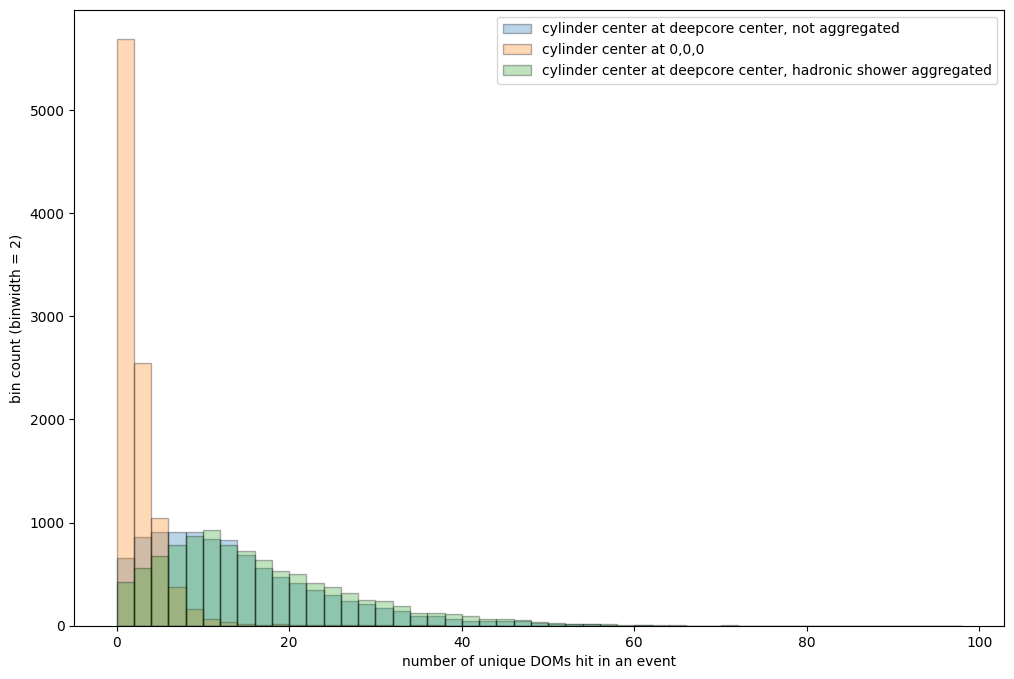

In [7]:
plt.figure(figsize=(12,8))
binnns = np.arange(0, 100, 2)
plt.hist(n_unique_hits_tenk_no_agg_deepcore, bins = binnns, alpha=0.3, edgecolor='black', label='cylinder center at deepcore center, not aggregated')
plt.hist(n_unique_hits_tenk_no_agg, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at 0,0,0')
plt.hist(n_unique_hits_tenk_agg_deepcore, bins = binnns, alpha=0.3,edgecolor='black', label='cylinder center at deepcore center, hadronic shower aggregated')
plt.xlabel('number of unique DOMs hit in an event')
plt.ylabel('bin count (binwidth = 2)')
plt.legend()

plt.plot()

In [8]:

n_hits_tenk_tenk_no_agg[max_hits_idx]

42.0

In [9]:
n_unique_hits_tenk_no_agg[max_hits_idx]

37.0

In [10]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 

In [11]:
tenk_no_agg['photons'][max_hits_idx]

{'sensor_pos_x': array([ 124.97,    1.71,   -9.68,   31.25,   31.25,  106.94,   57.2 ,
          57.2 ,  113.19,   57.2 ,  124.97,   31.25,   72.37,  124.97,
         113.19,   57.2 ,   31.25,  -10.97,  -10.97,   57.2 ,  124.97,
         113.19,    1.71,  113.19,   57.2 ,   46.29,   31.25,   31.25,
         124.97,   31.25,   -9.68,   72.37,   57.2 ,    1.71,  124.97,
          31.25,   46.29,   57.2 ,  113.19,   72.37,  113.19, -121.77]),
 'sensor_pos_y': array([-131.25, -150.63,  -79.5 ,  -72.93,  -72.93,   27.09, -105.52,
        -105.52,  -60.47, -105.52, -131.25,  -72.93,  -66.6 , -131.25,
         -60.47, -105.52,  -72.93,    6.72,    6.72, -105.52, -131.25,
         -60.47, -150.63,  -60.47, -105.52,  -34.88,  -72.93,  -72.93,
        -131.25,  -72.93,  -79.5 ,  -66.6 , -105.52, -150.63, -131.25,
         -72.93,  -34.88, -105.52,  -60.47,  -66.6 ,  -60.47, -171.03]),
 'sensor_pos_z': array([-2322.47, -2267.81, -2321.75, -2324.47, -2338.48, -2270.03,
        -2368.79, -2445.88, 